# Flexibility needs: capacity

In [1]:
import numpy as np
import pandas as pd
import windpype as wp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

windpype submodule "power" imported
windpype submodule "aux" imported
windpype submodule "capacity" imported
windpype module import complete


In [2]:
# SETUP FOR DK DATA
file_path = "data/"
power_cons_ob = wp.CombPowerData(file_path=file_path,file_name='DK1_DK2_power_cons_1hour')
alpha_cuts = [20,80]
colors = cm.rainbow(np.linspace(0, 1, 6))
duration_cuts = 2*np.array([[0.25,10],[10,24],[24,7*24],[7*24,3*30*24],[3*30*24,365*24],[365*24,1e6]]) # hours
freq_cuts = np.sort(1/duration_cuts/(60*60)) # Hz
freq_cuts[freq_cuts == np.min(freq_cuts)] = 0
freq_cuts_DK = freq_cuts
N_freqs = len(freq_cuts)
labels = ['< 10 hrs',\
          '10 - 24 hrs',\
          '24 hrs - 1 week',\
          '1 week - 3 months',\
          '3 months - 1 yr',\
          '> 1 yr']
power_cons_ob.info()
for ext in ['','_DK1','_DK2']:
    fluctuations_all = power_cons_ob.GetFluctuations(\
            epoch=2,col_name='TotalResLoad'+ext,power_name='TotalRenPower'+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
    fluctuations_low = power_cons_ob.GetFluctuations(\
            epoch=0,col_name='TotalResLoad'+ext,power_name='TotalRenPower'+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
    fluctuations_high = power_cons_ob.GetFluctuations(\
            epoch=1,col_name='TotalResLoad'+ext,power_name='TotalRenPower'+ext,freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
    if ext == '': fluctuations_all_DK = fluctuations_all
    if ext == '_DK1': fluctuations_all_DK1 = fluctuations_all
    if ext == '_DK2': fluctuations_all_DK2 = fluctuations_all

No method set for combining, will look for passed dataframe
No dataframe given, will look for saved file
Restored dataframe

--------
Data object contains:
67925 data points
from 2011-01-01 00:00:00 to 2018-09-30 23:00:00
Minimum time step: 0.0 sec
Maximum time step: 3600.0 sec
Most common time step: 3600.0 sec
--------

 Now calculating fluctuations during all epochs!
Relative amount of energy in each frequency interval:
For frequency interval: 1.39e-05 to 5.56e-04 Hz: 1.98e+06 MWh
6.4 % of integrated energy across all frequencies
For frequency interval: 5.79e-06 to 1.39e-05 Hz: 3.40e+06 MWh
11.0 % of integrated energy across all frequencies
For frequency interval: 8.27e-07 to 5.79e-06 Hz: 5.59e+06 MWh
18.2 % of integrated energy across all frequencies
For frequency interval: 6.43e-08 to 8.27e-07 Hz: 4.23e+06 MWh
13.7 % of integrated energy across all frequencies
For frequency interval: 1.59e-08 to 6.43e-08 Hz: 3.84e+06 MWh
12.5 % of integrated energy across all frequencies
For freque

Relative amount of energy in each frequency interval:
For frequency interval: 1.39e-05 to 5.56e-04 Hz: 7.00e+06 MWh
7.4 % of integrated energy across all frequencies
For frequency interval: 5.79e-06 to 1.39e-05 Hz: 1.64e+07 MWh
17.3 % of integrated energy across all frequencies
For frequency interval: 8.27e-07 to 5.79e-06 Hz: 1.76e+07 MWh
18.6 % of integrated energy across all frequencies
For frequency interval: 6.43e-08 to 8.27e-07 Hz: 1.06e+07 MWh
11.2 % of integrated energy across all frequencies
For frequency interval: 1.59e-08 to 6.43e-08 Hz: 1.25e+07 MWh
13.2 % of integrated energy across all frequencies
For frequency interval: 0.00e+00 to 1.59e-08 Hz: 3.08e+07 MWh
32.4 % of integrated energy across all frequencies
------


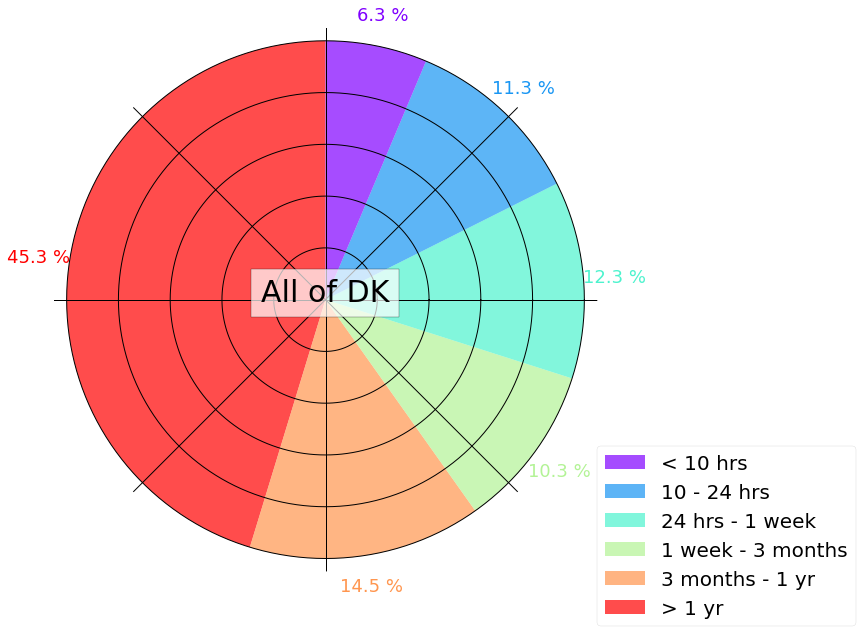

In [3]:
# PIE CHART
ext = ''
int_power_low_alpha = np.array([np.sum(fluctuations_low['int_power']['cut'+str(cut)]) for cut in range(N_freqs)])
int_power_high_alpha = np.array([np.sum(fluctuations_high['int_power']['cut'+str(cut)]) for cut in range(N_freqs)])
int_power_all_alpha = np.array([np.sum(fluctuations_all['int_power']['cut'+str(cut)]) for cut in range(N_freqs)])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,1,1,polar=True)
power_cons_ob.PlotPie(int_power=int_power_all_alpha[:],colors=colors[:],labels=labels,add=True,\
                      legend=True,alpha=0.7)
plt.subplots_adjust(left=0)
ax1 = plt.gca()
h1,l1 = ax1.get_legend_handles_labels()
ax1.legend(handles=h1[::-1], labels=labels, fontsize=20, loc=[1.,-0.1])
if ext == '': plt.text(0.39, 0.5, 'All of DK', fontsize=30, transform=plt.gcf().transFigure,\
                  bbox=dict(facecolor='white', alpha=0.7,pad=10))
if ext == '_DK1': plt.text(0.38, 0.5, 'Only DK1', fontsize=30, transform=plt.gcf().transFigure,\
                      bbox=dict(facecolor='white', alpha=0.7,pad=10))
if ext == '_DK2': plt.text(0.38, 0.5, 'Only DK2', fontsize=30, transform=plt.gcf().transFigure,\
                  bbox=dict(facecolor='white', alpha=0.7,pad=10))
if ext == '_BO': plt.text(0.39, 0.5, 'Only BO', fontsize=30, transform=plt.gcf().transFigure,\
                  bbox=dict(facecolor='white', alpha=0.7,pad=10))
ax1.grid(linewidth=1,color='k')
if ext == '': plt.savefig('plots/energy_DK.png',format='png',dpi=300)
if ext != '': plt.savefig('plots/energy'+ext+'.png',format='png',dpi=300)    

Penetration fraction is above 80% 27.00% of the time
With 11834 data points
Out of 67925 data points
Min and maximum epoch durations of high penetration: 1.000000 and 115.000000 hrs
Penetration fraction is below 20% 23.31% of the time
With 10215 data points
Out of 67925 data points
Min and maximum epoch durations of low penetration: 1.000000 and 94.000000 hrs
------

 Now calculating fluctuations during all epochs!
Relative amount of energy in each frequency interval:
For frequency interval: 1.39e-05 to 5.56e-04 Hz: 1.40e+06 MWh
6.9 % of integrated energy across all frequencies
For frequency interval: 5.79e-06 to 1.39e-05 Hz: 2.37e+06 MWh
11.7 % of integrated energy across all frequencies
For frequency interval: 8.27e-07 to 5.79e-06 Hz: 4.34e+06 MWh
21.4 % of integrated energy across all frequencies
For frequency interval: 6.43e-08 to 8.27e-07 Hz: 3.16e+06 MWh
15.6 % of integrated energy across all frequencies
For frequency interval: 1.59e-08 to 6.43e-08 Hz: 2.34e+06 MWh
11.6 % of inte

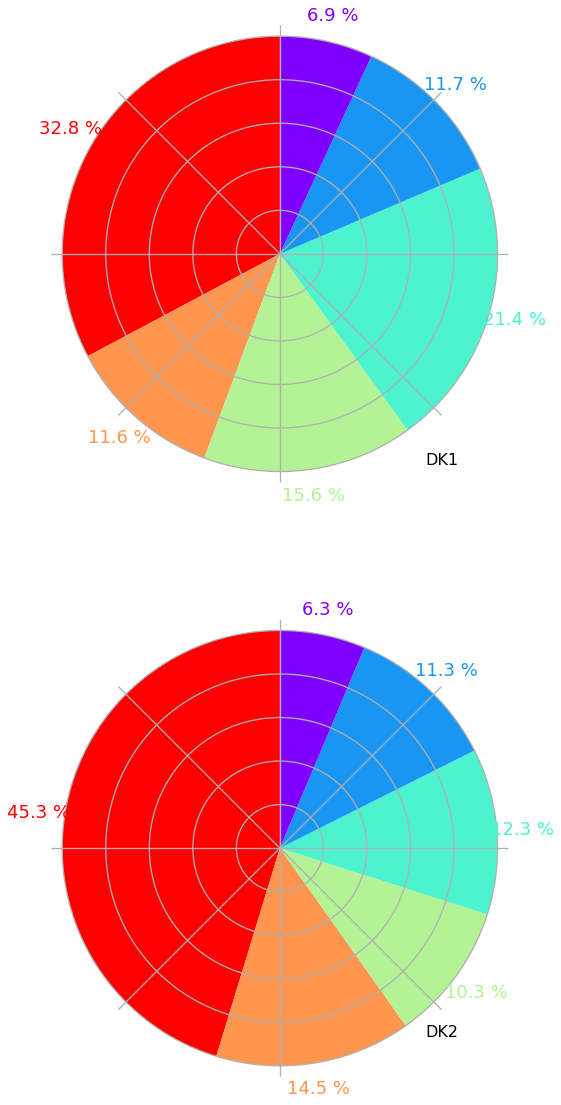

In [5]:
# Compare DK1 and DK2
power_cons_ob.AddHighPenetrationIndex(alpha_cuts=alpha_cuts,power_name='TotalRenPower_DK1')
fluctuations_all_DK1 = power_cons_ob.GetFluctuations(\
        epoch=2,col_name='TotalResLoad_DK1',freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
int_power_all_alpha_DK1 = np.array([np.sum(fluctuations_all_DK1['int_power']['cut'+str(cut)]) for cut in range(N_freqs)])

power_cons_ob.AddHighPenetrationIndex(alpha_cuts=alpha_cuts,power_name='TotalRenPower_DK2')
fluctuations_all_DK2 = power_cons_ob.GetFluctuations(\
        epoch=2,col_name='TotalResLoad_DK2',freq_cuts=freq_cuts,alpha_cuts=alpha_cuts)
int_power_all_alpha_DK2 = np.array([np.sum(fluctuations_all_DK2['int_power']['cut'+str(cut)]) for cut in range(N_freqs)])

fig = plt.figure(figsize=(9,15))
ax = fig.add_subplot(2,1,1,polar=True)
power_cons_ob.PlotPie(int_power=int_power_all_alpha_DK1,colors=colors,labels=labels,add=True,legend=True)
ax = fig.add_subplot(2,1,2,polar=True)
power_cons_ob.PlotPie(int_power=int_power_all_alpha_DK2,colors=colors,labels=labels,add=True,legend=False)
plt.tight_layout()
plt.text(0.65, 0.58, 'DK1', fontsize=16, transform=plt.gcf().transFigure)
plt.text(0.65, 0.05, 'DK2', fontsize=16, transform=plt.gcf().transFigure)
plt.subplots_adjust(hspace=0.3,left=-0.1,right=0.95)
plt.savefig('plots/energy_DK1_DK2.png',format='png',dpi=300)# Compare DK1 and DK2

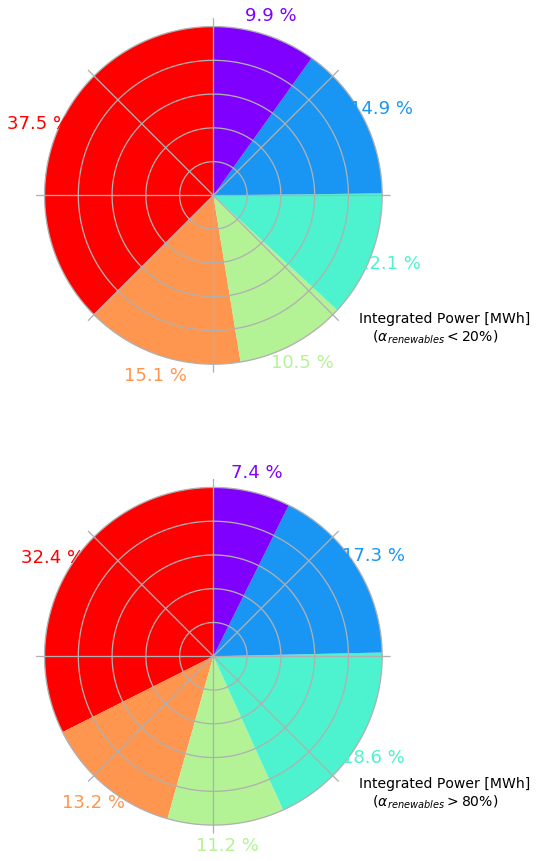

In [4]:
# Compare epochs of low and high renewable share
fig = plt.figure(figsize=(9,15))
ax = fig.add_subplot(2,1,1,polar=True)
power_cons_ob.PlotPie(int_power=int_power_low_alpha,colors=colors,labels=labels,add=True,legend=True)
ax = fig.add_subplot(2,1,2,polar=True)
power_cons_ob.PlotPie(int_power=int_power_high_alpha,colors=colors,labels=labels,add=True,legend=False)
plt.text(0.65, 0.58, 'Integrated Power [MWh]\n'+r'   ($\alpha_{renewables}<20\%$)', fontsize=14, transform=plt.gcf().transFigure)
plt.text(0.65, 0.15, 'Integrated Power [MWh]\n'+r'   ($\alpha_{renewables}>80\%$)', fontsize=14, transform=plt.gcf().transFigure)
plt.subplots_adjust(hspace=0.3,left=-0.1,right=0.95)
plt.savefig('plots/pie_charts.png',format='png',dpi=300)